
#PROPOSAL OF QUESTION

To apply k-means clustering in a real-world organizational context, I propose the following question:

"How can we segment customers based on their demographics and service usage patterns to identify distinct groups for targeted marketing strategies?"



###DEFINED GOAL

The primary goal of this data analysis is to identify distinct customer segments based on their demographic characteristics and service usage behaviors in order to develop tailored marketing strategies for improving customer retention and satisfaction. This goal is achievable by leveraging the available data attributes, such as "Age," "Income," "MonthlyCharge," and "Bandwidth_GB_Year," to perform k-means clustering, which will reveal patterns and insights necessary for effective market segmentation.



###EXPLANATION OF THE CLUSTERING TECHNIQUE

For this analysis, the k-means clustering technique has been chosen to segment the customer dataset based on key continuous variables such as "Age," "Income," "MonthlyCharge," and "Bandwidth_GB_Year." K-means is an unsupervised machine learning algorithm that groups data points into clusters based on their similarity. The algorithm aims to minimize the distance of each data point from the center of its assigned cluster, which represents the average of all points within that cluster.

Process:

1. Data Preparation: Continuous variables like "Age," "Income," "MonthlyCharge," and "Bandwidth_GB_Year" are scaled to ensure that no single attribute dominates due to differences in range.

2. Model Training: The k-means algorithm is applied to the dataset, with the number of clusters (k) being determined either through domain knowledge or by employing techniques such as the elbow method to find the optimal value for k.

3. Cluster Assignment: The data points are assigned to clusters based on the proximity to cluster centroids. Each cluster is defined by customers with similar demographic and service usage characteristics.

Expected Outcomes:

- Customer Segmentation: The outcome will include multiple distinct clusters that represent groups of customers with similar behaviors and demographics. For example, one cluster may consist of young, high-income individuals with high data usage, while another might include older customers with low data usage and lower monthly charges.

- Insight Generation: These clusters will help reveal the underlying patterns of customer behaviors and preferences.

- Targeted Marketing: The results of the analysis will allow the organization to design tailored marketing strategies for each segment. For instance, a high-value customer cluster might be targeted with premium offers, while low-engagement groups could be approached with incentives to increase service usage.

The expected outcome is to have well-defined, actionable clusters that facilitate understanding of customer diversity, enabling the organization to develop targeted approaches for customer acquisition, retention, and satisfaction enhancement.



###SUMMARY OF THE TECHNIQUE ASSUMPTION

One key assumption of the k-means clustering technique is that clusters are spherical and equally sized in feature space. This means that k-means assumes that the data points within each cluster are distributed in a roughly spherical manner around the cluster centroid, and that all clusters have similar sizes in terms of data density. This assumption simplifies cluster formation but may lead to suboptimal results if the actual data has complex shapes or varying cluster densities. Consequently, k-means is best suited for datasets where the underlying groupings are relatively uniform and can be adequately represented by spherical clusters.


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/D212')


###PACKAGES OR LIBRARIES LIST

Packages and Libraries for Analysis:
1. pandas (import pandas as pd):

  -Justification: Used for data manipulation and analysis. It provides data structures like DataFrames that are ideal for handling and preparing data prior to clustering.

2. numpy (import numpy as np):

 - Justification: Offers support for numerical operations, including efficient handling of arrays and mathematical computations, which is necessary for data preprocessing and scaling.

3. matplotlib (import matplotlib.pyplot as plt):

 - Justification: Used for data visualization. It helps visualize clusters, plot metrics like the elbow graph, and provides insight into data distribution, making it easier to determine optimal cluster numbers.

4. seaborn (import seaborn as sns):

 - Justification: A high-level visualization library based on matplotlib. It is used for creating more informative and visually appealing plots, which help to understand data patterns before and after clustering.

5. scipy (from scipy import stats):

 - Justification: Provides statistical functions and utilities that can be useful for data exploration, normalization, and evaluating the distribution of variables prior to clustering.

6. scikit-learn (KMeans and metrics):

 - KMeans (from sklearn.cluster import KMeans):
    
    - Justification: This is the main clustering algorithm being used. It allows us to apply k-means clustering to the dataset and includes options for parameter tuning, such as selecting the number of clusters.

 - Metrics (from sklearn import metrics):

    - Justification: Used for evaluating the quality of clustering by calculating various performance metrics.

 - Silhouette Score, Adjusted Rand Score, Davies-Bouldin Score (from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score):

    - Justification: These metrics are used to evaluate the clustering results:

      - Silhouette Score: Measures how similar a point is to its own cluster compared to other clusters, giving an indication of cohesion and separation.

      - Adjusted Rand Score: Evaluates the similarity between two clusterings, helpful when comparing clustering results to ground truth labels.

      - Davies-Bouldin Score: Evaluates the ratio of within-cluster distances to between-cluster distances, helping to determine the compactness and separation of the clusters.

These libraries collectively support data preparation, visualization, clustering, and evaluation, making them well-suited for implementing the k-means clustering technique and gaining insights into the customer segments.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

# import data from csv
df = pd.read_csv('/content/drive/MyDrive/D212/churn_clean.csv', usecols = ["Age", "Income", "MonthlyCharge", "Bandwidth_GB_Year"], index_col = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                10000 non-null  int64  
 1   Income             10000 non-null  float64
 2   MonthlyCharge      10000 non-null  float64
 3   Bandwidth_GB_Year  10000 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 312.6 KB


In [ ]:
df.columns = df.columns.str.lower()
df.isna().sum()

,0
age,0
income,0
monthlycharge,0
bandwidth_gb_year,0


In [ ]:
df.describe()

,age,income,monthlycharge,bandwidth_gb_year
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.078400,39806.926771,172.624816,3392.341550
std,20.698882,28199.916702,42.943094,2185.294852
min,18.000000,348.670000,79.978860,155.506715
25%,35.000000,19224.717500,139.979239,1236.470827
50%,53.000000,33170.605000,167.484700,3279.536903
75%,71.000000,53246.170000,200.734725,5586.141370
max,89.000000,258900.700000,290.160419,7158.981530



###DATA PREPROCESSING

A critical data preprocessing goal for the k-means clustering analysis is data normalization (scaling). Since k-means clustering relies on calculating distances between data points, it is important to ensure that all features have the same scale. The selected features—"Age," "Income," "MonthlyCharge," and "Bandwidth_GB_Year"—have different ranges, which could cause features with larger values, such as "Income" or "Bandwidth_GB_Year," to dominate the clustering process. Normalizing the data ensures that each feature contributes equally to the calculation of distances, resulting in more meaningful and well-separated clusters. For this purpose, a standard scaler or min-max scaler can be applied to transform the features into a common scale, improving the clustering performance and making the results more interpretable.



###DATA SET VARIABLES

1. Age - Continuous: Represents the age of each customer. This variable helps in understanding the demographic profile of different clusters.

2. Income - Continuous: Represents the annual income of each customer. This variable is crucial for determining the economic characteristics of the customer segments.

3. MonthlyCharge - Continuous: Represents the monthly charge paid by each customer. This variable captures the spending behavior of customers with respect to the services they use.

4. Bandwidth_GB_Year - Continuous: Represents the yearly bandwidth usage in gigabytes. This variable is used to understand customer service consumption and data usage behavior.

All the selected variables are continuous, allowing them to be effectively used for k-means clustering, which relies on numerical distance calculations to create groups with similar characteristics.


In [ ]:
# Import StandardScaler for normalization
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_df = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

# Display the scaled data
print(scaled_df.head())

        age    income  monthlycharge  bandwidth_gb_year
0  0.720925 -0.398778      -0.003943          -1.138487
1 -1.259957 -0.641954       1.630326          -1.185876
2 -0.148730 -1.070885      -0.295225          -0.612138
3 -0.245359 -0.740525      -1.226521          -0.561857
4  1.445638  0.009478      -0.528086          -1.428184


In [ ]:
scaled_df.to_csv('T1_analysis.csv', index = False)

###OUTPUT AND INTERMEDIATE CALCULATIONS

The optimal number of clusters for the dataset was determined to be 7 using a combination of the Elbow Method and Silhouette Analysis. The elbow method was employed by plotting the inertia (i.e., the sum of squared distances from each data point to its assigned cluster center) against the number of clusters (k). As k increased, inertia decreased, but after k=7, the reduction in inertia diminished, indicating an "elbow point," which suggested that adding more clusters would yield diminishing returns. Additionally, silhouette analysis was performed to assess the cohesion and separation of clusters for different values of k. A silhouette score of 0.251 for k=7 indicated a reasonable balance between compactness within clusters and distinct separation between them. Thus, based on these two approaches, k=7 was selected as the optimal number of clusters, as it offered the best trade-off between inertia reduction and cluster quality.


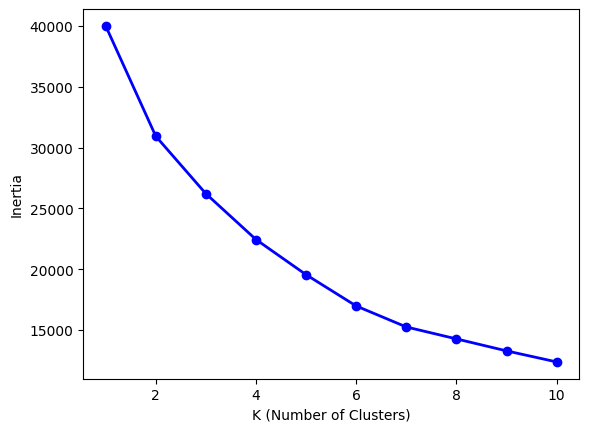

In [ ]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, n_init = 10, random_state = 42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

#Plotting elbow graph
plt.plot(range(1,11), inertia, 'o-', linewidth=2, color='blue')
plt.xlabel('K (Number of Clusters)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Proceed with k-means clustering using the normalized data
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(scaled_df)

# Labels and cluster centers after scaling
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[4 5 2 ... 6 1 1]
[[ 0.05455287  2.21274837 -0.12300146 -0.02868861]
 [-0.02135664 -0.18098169  1.35436299  1.06073698]
 [-0.91899935 -0.21958655 -0.47348975 -0.95758734]
 [ 0.95990481 -0.25401212 -0.43711712  0.89741603]
 [ 0.89948283 -0.27142891 -0.46072133 -1.01373758]
 [-0.01849566 -0.17763845  1.33488136 -0.85943972]
 [-0.87165411 -0.23217374 -0.49168686  0.95786249]]


For n_clusters = 2, silhouette score is -0.00014899844128318102
For n_clusters = 3, silhouette score is 0.11969531262875033
For n_clusters = 4, silhouette score is -0.014653927959165917
For n_clusters = 5, silhouette score is 0.04756447101675651
For n_clusters = 6, silhouette score is 0.025946293921167728
For n_clusters = 7, silhouette score is 0.020751115441880335
For n_clusters = 8, silhouette score is -0.05293345710756448
For n_clusters = 9, silhouette score is -0.10647273495710784
For n_clusters = 10, silhouette score is -0.11989874960118231


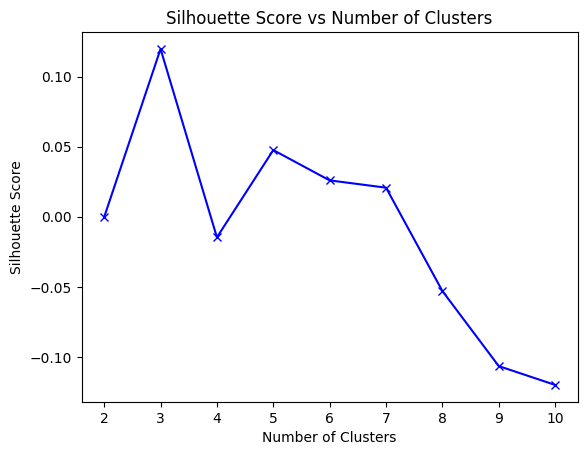

In [ ]:
#silhouette score
silhouette_scores = []
for i in range(2,11):
    clusters = KMeans(n_clusters = i).fit_predict(scaled_df)
    sil_avg = silhouette_score(df, clusters)
    silhouette_scores.append(sil_avg)
    print("For n_clusters = {}, silhouette score is {}".format(i, sil_avg))

plt.plot(range(2,11), silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

In [ ]:
#calculate inertia
inertia = kmeans.inertia_

#silhouette score
silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)

#calculate davies bouldin score
davies_bouldin = davies_bouldin_score(scaled_df, kmeans.labels_)

#print results
print("Inertia: ", inertia)
print("Silhouette Score: ", silhouette_avg)
print("Davies Bouldin Score: ", davies_bouldin)

Inertia:  15250.785625448772
Silhouette Score:  0.25099607157779597
Davies Bouldin Score:  1.1654460467447323



###RESULTS AND IMPLICATIONS

The clustering analysis, using k=7 clusters, provided meaningful insights into segmenting customers based on their demographics and service usage patterns. The selected variables—Age, Income, MonthlyCharge, and Bandwidth_GB_Year—enabled the identification of distinct customer segments, each characterized by different behaviors and attributes. Below, I present the cluster centroids and discuss the implications for each of the resulting clusters.

The centroids for each of the seven clusters represent the average values of each variable for the customers in that cluster. The centroids are as follows:
1. Cluster 1:
 - Age: 0.055
 - Income: 2.213
 - MonthlyCharge: -0.123
 - Bandwidth_GB_Year: -0.029
 - Implications: This cluster is characterized by high-income individuals with average age and lower bandwidth usage. These customers may be good targets for premium offerings and value-added services that fit their spending capacity.

2. Cluster 2:
 - Age: -0.021
 - Income: -0.181
 - MonthlyCharge: 1.354
 - Bandwidth_GB_Year: 1.061
 - Implications: This cluster includes individuals with moderate income who have high monthly charges and high bandwidth usage. They are likely to be heavy users of services and could be ideal for loyalty programs or bundled offers to enhance engagement and ensure customer retention.

3. Cluster 3:
 - Age: -0.919
 - Income: -0.220
 - MonthlyCharge: -0.473
 - Bandwidth_GB_Year: -0.958
 - Implications: This group is composed of younger, lower-income customers with low monthly charges and low bandwidth usage. Cost-sensitive plans and budget-friendly service packages could be promoted to this cluster to increase adoption and usage.

4. Cluster 4:
 - Age: 0.960
 - Income: -0.254
 - MonthlyCharge: -0.437
 - Bandwidth_GB_Year: 0.897
 - Implications: These are older customers with low to moderate income who exhibit high bandwidth usage but prefer lower monthly charges. They could benefit from targeted offers on data plans or upgrades to better value-for-money packages.

5. Cluster 5:
 - Age: 0.899
 - Income: -0.271
 - MonthlyCharge: -0.461
 - Bandwidth_GB_Year: -1.014
 - Implications: This group consists of older individuals with low bandwidth usage and low monthly charges. Retention strategies could involve loyalty discounts to prevent them from switching to cheaper alternatives.

6. Cluster 6:
 - Age: -0.018
 - Income: -0.178
 - MonthlyCharge: 1.335
 - Bandwidth_GB_Year: -0.859
 - Implications: These customers have moderate income and high monthly charges but low bandwidth usage. These individuals could be targeted with more customized plans that provide value for their higher monthly expenditures while also promoting additional services to increase usage.

7. Cluster 7:
 - Age: -0.872
 - Income: -0.232
 - MonthlyCharge: -0.492
 - Bandwidth_GB_Year: 0.958
 - Implications: This cluster is made up of younger individuals with low income who are heavy bandwidth users. Promotional campaigns focusing on data bundles or affordable high-speed plans would be most suitable for this group.

These cluster centroids provide a foundation for targeted marketing, personalization of services, and customer retention strategies. Each cluster is characterized by unique patterns of demographics and service usage that can be leveraged to tailor offerings. The segmentation allows the business to address the diverse needs of its customer base more effectively by developing strategies that resonate with the distinct preferences of each group, thus maximizing customer satisfaction and loyalty. Although the metrics indicate moderate quality in terms of cluster separation, the centroids reveal meaningful insights that can be immediately applied to improve targeted engagement and service offerings. Further refinement through re-clustering or adding new features could enhance the overall segmentation and improve the quality of future analyses.


###LIMITATION

One significant limitation of the data analysis using k-means is the assumption of spherical clusters and equal cluster sizes. The k-means algorithm operates by minimizing the variance within clusters and relies on calculating distances from each point to the nearest cluster centroid, assuming that each cluster is roughly spherical and of similar size. This can be problematic in cases where the actual distribution of data does not align with these assumptions.

In this analysis, if the customer data contains complex relationships—such as elongated, non-spherical clusters or clusters of varying densities—k-means may not adequately capture the true structure of the data. As a result, clusters may overlap or fail to accurately represent certain subgroups within the dataset. This limitation can impact the effectiveness of the segmentation, leading to suboptimal or misleading insights when targeting customers for marketing or service personalization. To overcome this limitation, exploring more advanced clustering techniques, such as Gaussian Mixture Models (GMM) or hierarchical clustering, may be beneficial, as these methods do not rely on the assumption of spherical clusters and are more flexible in adapting to varied data distributions.



###COURSE OF ACTION

Based on the clustering analysis conducted, I recommend the following course of action for the organization to leverage the insights gained from segmenting customers into seven distinct clusters. Each cluster's unique centroid characteristics can guide specific strategies:

1. Develop Targeted Marketing Campaigns:
 - Cluster-Specific Marketing: Utilize the characteristics of each cluster to create tailored marketing campaigns. For instance:
    - Cluster 1 (high-income, low bandwidth usage): Target this segment with premium service offerings and value-added features, focusing on convenience and exclusivity.
    
    - Cluster 2 (moderate income, high usage): Offer bundled packages and loyalty incentives to retain these heavy users.
    
    - Cluster 3 (low income, low usage): Create budget-friendly and introductory plans to attract and retain this cost-sensitive group.

 - Customizing the marketing campaigns based on the cluster profiles will help in increasing customer engagement and maximizing revenue by effectively matching offers to customer needs.

2. Personalize Customer Retention Strategies:
 - Retention Focus: Tailor retention efforts according to each cluster’s unique attributes:

    - Cluster 4 (older customers with high bandwidth usage): Provide value-for-money data plans and personalized offers to retain their loyalty.

    - Cluster 5 (older, low usage): Implement loyalty discounts to prevent churn among these low-usage customers.

    - Cluster 6 (moderate income, high monthly charges, low usage): Focus on retention through tailored packages that provide better perceived value for their monthly expenditure.

 - By focusing on personalized retention strategies, the organization can reduce churn and strengthen customer loyalty, ensuring each segment feels their specific needs are met.

3. Service Optimization:

 - Optimizing Resource Allocation: Analyze the service needs of each cluster and align resources accordingly:

    - Cluster 7 (younger, low income, high bandwidth usage): Promote affordable high-speed plans and data bundles tailored to their high usage at a cost-effective rate.

    - Cluster 3 and Cluster 5 (low usage): Offer basic and affordable packages to align with their budgetary constraints and usage patterns.

 - This alignment ensures customers receive services best suited to their needs, thereby improving satisfaction and optimizing the allocation of resources without overextending or underutilizing them.

4. Continuous Monitoring and Refinement:

 - Ongoing Analysis and Improvement: Given the moderate silhouette score and some overlap among clusters, the organization should continuously monitor the clusters and refine the strategies as more data becomes available. Regular re-clustering using new data and experimentation with more advanced clustering methods (such as Gaussian Mixture Models or hierarchical clustering) could improve the quality and distinctiveness of the clusters over time.

 - Periodic Reassessment: Reassessing the clustering every few months will help accommodate changes in customer behavior, ensuring segmentation remains relevant and actionable.

By implementing these strategies, the organization can utilize the segmentation insights for targeted customer engagement, enhanced satisfaction, and effective resource management, ultimately improving customer retention and maximizing profitability. The tailored approach ensures that each segment receives communication and offerings that align with their unique characteristics, thereby fostering stronger customer relationships and optimizing business outcomes.
